<a href="https://colab.research.google.com/github/Sepali21/Finanzas-Computacionales/blob/main/Taller_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Bloc con sangría
#Taller 3
Sebastian Parraga -
Cristian Vega -
Maria Fernanda Gutierrez

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import cvxpy as cp
import warnings
!pip install --quiet yfinance
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions
warnings.simplefilter("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Punto 1


1. Escoja una acción de su preferencia. Con la información histórica para el periodo Ene-2016 a Dic-2021, estime los parámetros μ y σ.

In [ ]:
nflx = yf.download("NFLX",start="2016-01-01",end="2021-12-31")
precios =nflx.loc[:, "Adj Close"].dropna()
precios

[*********************100%***********************]  1 of 1 completed


Date
2016-01-04    109.959999
2016-01-05    107.660004
2016-01-06    117.680000
2016-01-07    114.559998
2016-01-08    111.389999
                 ...    
2021-12-23    614.090027
2021-12-27    613.119995
2021-12-28    610.710022
2021-12-29    610.539978
2021-12-30    612.090027
Name: Adj Close, Length: 1510, dtype: float64

In [ ]:
retornos = np.log(precios/precios.shift(1)).dropna()
retornos

Date
2016-01-05   -0.021139
2016-01-06    0.088991
2016-01-07   -0.026870
2016-01-08   -0.028061
2016-01-11    0.031634
                ...   
2021-12-23   -0.000244
2021-12-27   -0.001581
2021-12-28   -0.003938
2021-12-29   -0.000278
2021-12-30    0.002536
Name: Adj Close, Length: 1509, dtype: float64

In [ ]:
mu_n = retornos.mean()
sigma_n = retornos.std()
mu_n,sigma_n

(0.001137682385306665, 0.024661199386764695)

a. Con estos parámetros construya 10.000 trayectorias del precio que sigan el proceso
estocástico:

St = St−1 exp{(μ– 1/2σ
2
)dt + σ dWt
}

Donde: Wt es un proceso estándar de Wiener. Presente gráficamente las primeras 20
trayectorias del proceso para un tiempo de un año (T=1).

In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):   
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S # {"S":S} 
    return St

In [ ]:
T = 1
sigma = sigma_n
mu = mu_n
S0 = precios.iloc[-1]
NS = 10000
M = 252
St = PathsGBM(S0,mu,sigma,T,NS,M)
St

array([[612.09002686, 611.8661307 , 611.81821241, ..., 609.64043015,
        609.69821108, 608.84146281],
       [612.09002686, 612.6158334 , 612.16601492, ..., 617.92615638,
        619.44092245, 618.96278494],
       [612.09002686, 612.11719066, 610.81131894, ..., 656.61788217,
        655.88504438, 656.94667727],
       ...,
       [612.09002686, 612.92523542, 611.31466251, ..., 609.89508141,
        608.35860763, 609.8224429 ],
       [612.09002686, 613.04645822, 614.31300247, ..., 642.4480029 ,
        643.03942991, 642.42694542],
       [612.09002686, 611.81324493, 611.6093663 , ..., 611.95396593,
        612.70593832, 614.31033421]])

Text(0, 0.5, 'S(t)')

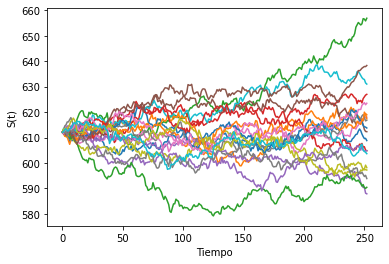

In [ ]:
plt.plot(np.transpose(St[0:20,:])) 
plt.xlabel("Tiempo")
plt.ylabel("S(t)")

b. Presente los histogramas de los precios y retornos al final del periodo (T=1).

(array([1.000e+00, 2.000e+00, 5.000e+00, 2.200e+01, 5.000e+01, 7.700e+01,
        1.480e+02, 2.530e+02, 3.920e+02, 5.320e+02, 7.050e+02, 8.430e+02,
        9.440e+02, 1.030e+03, 1.011e+03, 9.740e+02, 7.860e+02, 7.000e+02,
        5.050e+02, 3.810e+02, 2.600e+02, 1.690e+02, 1.050e+02, 5.100e+01,
        2.300e+01, 2.000e+01, 6.000e+00, 1.000e+00, 2.000e+00, 2.000e+00]),
 array([557.23722497, 561.20048933, 565.16375368, 569.12701803,
        573.09028238, 577.05354674, 581.01681109, 584.98007544,
        588.94333979, 592.90660415, 596.8698685 , 600.83313285,
        604.7963972 , 608.75966156, 612.72292591, 616.68619026,
        620.64945461, 624.61271897, 628.57598332, 632.53924767,
        636.50251202, 640.46577638, 644.42904073, 648.39230508,
        652.35556943, 656.31883379, 660.28209814, 664.24536249,
        668.20862684, 672.1718912 , 676.13515555]),
 <a list of 30 Patch objects>)

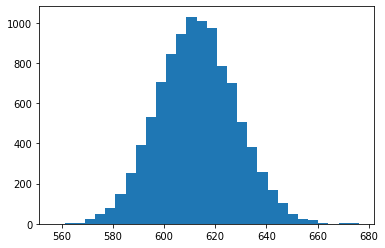

In [ ]:
plt.hist(St[:,252], bins=30)

In [ ]:
St_r = pd.DataFrame(St)
St_r

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,612.090027,611.866131,611.818212,611.881987,611.038125,610.402308,608.485188,609.109688,608.778364,609.716500,...,611.242163,611.368843,612.574042,613.396698,612.718638,611.422693,610.414995,609.640430,609.698211,608.841463
1,612.090027,612.615833,612.166015,610.305269,610.167655,608.720790,607.373011,609.067700,610.679798,612.423646,...,619.014912,618.339438,618.457133,617.915223,616.364647,617.514436,616.662685,617.926156,619.440922,618.962785
2,612.090027,612.117191,610.811319,610.559994,611.017996,611.923135,611.999756,614.217011,613.288029,614.219000,...,653.450451,654.363265,655.269723,654.788283,654.303167,654.761448,656.790176,656.617882,655.885044,656.946677
3,612.090027,611.730823,612.650585,611.912990,612.795318,613.737941,613.215786,611.493186,610.792862,610.434708,...,625.325322,623.382233,624.665881,624.204973,624.634608,623.646786,625.346841,626.061425,626.717779,627.020614
4,612.090027,611.936153,610.990032,610.950169,610.745457,610.245729,610.182435,609.024606,609.602070,610.125515,...,595.006581,595.568384,594.722371,593.982361,592.305295,591.233132,590.399037,590.529253,588.169773,587.908477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,612.090027,610.912270,610.486511,611.029162,611.490408,611.449868,611.905094,612.157193,613.327644,614.610773,...,640.655553,642.969141,642.109446,643.481401,643.213091,643.738273,644.018355,644.535018,645.191876,644.160543
9996,612.090027,612.275111,612.027353,612.017733,612.187658,612.331039,612.423702,611.948031,612.615904,613.529772,...,608.846425,608.088683,608.150443,608.510282,607.665619,607.383634,606.797704,606.423596,605.577575,605.502910
9997,612.090027,612.925235,611.314663,611.278308,610.377918,611.718317,612.489548,612.440321,611.858871,612.183241,...,612.888395,612.483426,613.119364,613.409264,613.589890,612.143694,609.999799,609.895081,608.358608,609.822443
9998,612.090027,613.046458,614.313002,615.401456,614.562152,615.585379,614.948666,613.808912,613.355697,612.758349,...,640.810475,640.493448,640.474326,640.241723,640.172586,641.424411,642.506531,642.448003,643.039430,642.426945


In [ ]:
retornos_m = np.log(St_r/St_r.shift(1)).dropna()

(array([1.000e+00, 3.000e+00, 2.000e+00, 3.000e+00, 1.700e+01, 4.500e+01,
        9.900e+01, 1.770e+02, 2.890e+02, 4.410e+02, 6.180e+02, 8.900e+02,
        1.027e+03, 1.116e+03, 1.153e+03, 1.082e+03, 9.690e+02, 7.290e+02,
        5.340e+02, 3.530e+02, 2.080e+02, 1.300e+02, 5.800e+01, 3.100e+01,
        1.800e+01, 5.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.14748722, -0.13712065, -0.12675409, -0.11638752, -0.10602095,
        -0.09565438, -0.08528782, -0.07492125, -0.06455468, -0.05418812,
        -0.04382155, -0.03345498, -0.02308841, -0.01272185, -0.00235528,
         0.00801129,  0.01837785,  0.02874442,  0.03911099,  0.04947756,
         0.05984412,  0.07021069,  0.08057726,  0.09094383,  0.10131039,
         0.11167696,  0.12204353,  0.13241009,  0.14277666,  0.15314323,
         0.1635098 ]),
 <a list of 30 Patch objects>)

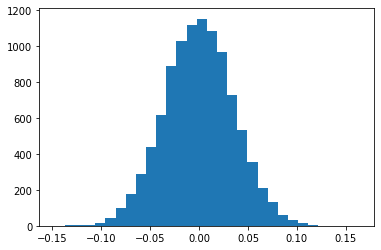

In [ ]:
plt.hist(retornos_m.iloc[:,252], bins=30)

De acuerdo a los dos histogramas, los precios modelados y los retornos son variables aleatorias distribuidas normalmente.

c. Demuestre que el valor terminal del precio simulado de la acción converge a
ST exp{(μ– 1/2σ
2
)}.

In [ ]:
St[:,250].mean()

612.8838038801381

In [ ]:
S0 * np.exp(mu*T)

612.7867871680587

Con estos resultados es posible afirmar que la distribución es normal con valor esperado, pues los valores son muy parecidos.


d. Calcule la probabilidad de que los retornos de la acción sean inferiores a cero.

In [ ]:
Stsup = retornos_m.iloc[:,250] < 0
Stsup = pd.DataFrame(Stsup)
Stsup.value_counts()/NS

250  
False    0.5013
True     0.4986
dtype: float64

Según los resultados, existe una probabilidad aproximada de 50% de que los retornos de la acción de Netflix sean inferiores a 0, por lo cual la recomendación es no invertir en esta acción.


#Punto 2

a. Construir el portafolio de mínima varianza global de Markowitz. Presentar el grafico de
pesos y sus medidas de retorno esperado y volatilidad

In [ ]:
#Información histórica
activos = ["JPM", "MCD","META","WMT"]
precios =  yf.download(activos,start="2010-01-01",end="2021-12-31")
precios= precios.loc[:,"Adj Close"].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()
mu = retornos.mean()
sigma = retornos.std()
cov = retornos.cov()
n = len(mu)

[*********************100%***********************]  4 of 4 completed


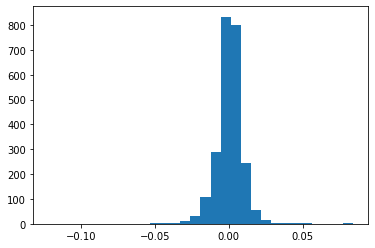

In [ ]:
w = cp.Variable(n)
risk = cp.quad_form(w,cov)
objective = cp.Minimize(risk)
constraints = [cp.sum(w)==1, w>=0]
optim = cp.Problem(objective,constraints)
optim.solve()
wpmvg = w.value
ret_port = retornos @ wpmvg 
plt.hist(ret_port,bins=30)
plt.show()

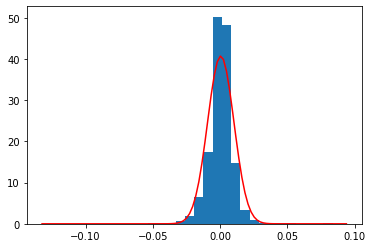

In [ ]:
rp = ret_port.mean()
sigmap = ret_port.std()
rp, sigmap
plt.hist(ret_port,bins=30,density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
px = norm.pdf(x,rp,sigmap)
plt.plot(x,px,'r')

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.07it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,855.042790,50.710202,-2502.115510,inf,0.057021,2.791821e-07
lognorm,1767.052506,3411.398846,-737.605643,inf,0.086364,3.743779e-16
norm,1776.418689,3341.554548,-732.603939,inf,0.085170,1.012271e-15
chi2,6338.640547,1880.228549,2353.584777,inf,0.205766,2.484007e-90
exponpow,10103.075716,874.923540,3481.729688,inf,0.305776,2.476821e-201


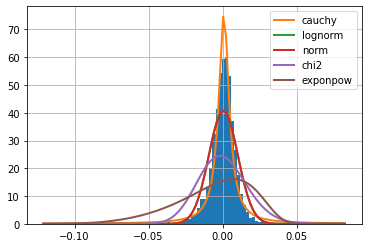

In [ ]:
frp = Fitter(ret_port, distributions= get_common_distributions())
frp.fit()
frp.summary()

b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
estándar o paramétrico

In [ ]:
# VaR Estandar o Parametrico 99% de confianza
VaRE = np.percentile(retornos,1)
VaRE

-0.045614898304579224

In [ ]:
# VaR Estandar o Parametrico 95% de confianza
VaRE = np.percentile(retornos,5)
VaRE

-0.0229133197025092

Segun el modelo estandar del Value at Risk, tenemos que para la confianza del 99% da un valor del 4.5%, demostrando un mayor riesgo, sin embargo, para el 95% de confianza se encuentra que tenemos un 2.29%, lo que muestra un riesgo bajo segun la confianza 

c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
de estimación histórica

In [ ]:
# VaR Historico 99% de confianza
VaRH = np.percentile(ret_port,1)
VaRH

-0.024284997970459455

In [ ]:
# VaR Historico 95% de confianza
VaRH = np.percentile(ret_port,5) 
VaRH

-0.01397700165954955

Segun el modelo historico del Value at Risk, tenemos que para la confianza del 99% da un valor del 2.42%, demostrando un mayor riesgo historico del portafolio, sin embargo, para el 95% de confianza se encuentra que tenemos un 1.39%, lo que muestra un riesgo más bajo segun la confianza y al mismo tiempo una mejor opcion.

d. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
de simulación

In [ ]:
# VaR Simulacion 99% de confianza
alpha = 0.01
VaRp = rp - norm.ppf(1-alpha)*sigmap
VaRp# *np.sqrt(10)

-0.022253171267348687

In [ ]:
# VaR Simulacion 95% de confianza
alpha = 0.05
VaRp = rp - norm.ppf(1-alpha)*sigmap
VaRp# *np.sqrt(10)

-0.015576028246511163

Segun el modelo simulado del Value at Risk, tenemos que para la confianza del 99% da un valor del 2.22%, demostrando un mayor riesgo a futuro del portafolio, sin embargo, para el 95% de confianza se encuentra que tenemos un 1.55%, lo que muestra un riesgo más bajo segun la confianza, teniendo que la mejor opcion es la confianza del 95%.

# Punto 3

3. Con la información de los registros de pérdidas de la entidad TuDeuda Ltda:

In [ ]:
D3 = pd.read_excel('/content/DataLoss.xlsx')
D3

,Date,Loss
0,2001-01-01,18986
1,2001-02-01,7312
2,2001-03-01,581
3,2001-04-01,4995
4,2001-05-01,10808
...,...,...
247,2021-08-01,9853
248,2021-09-01,6394
249,2021-10-01,18765
250,2021-11-01,2816


a. Realizar un análisis exploratorio de los datos (media, desviación, curtosis, simetría).
Apoye su análisis con gráficos (histogramas y QQplot).

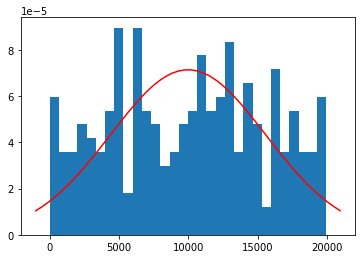

In [ ]:
plt.hist(D3['Loss'], density=True,bins=30) 
sigma= D3['Loss'].std()
m= D3['Loss'].mean()
xmin, xmax=plt.xlim()
x = np.linspace(xmin,xmax)
px= norm.pdf(x,m,sigma)
plt.plot(x,px,'r')
plt.show()


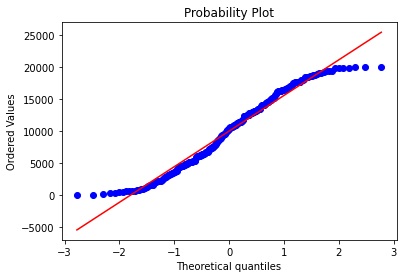

In [ ]:
import pylab 
import scipy.stats as stats
stats.probplot(D3['Loss'], dist="norm", plot=pylab)
pylab.show()

Se puede inferir de los datos que existe una alta correlación, ya que son una serie de tiempo, asismismo, que estos se distribuyen de una forma aparentemente normall, por lo que sería necesario profundizar en el tipo de distribución y de tal forma saber como tratarlos (reversión a la media o datos con tendencia).


b. ¿Qué puede decir de la distribución de los datos de pérdidas de la entidad?

Aún cuando aparenta tener una distribución normal, se evidencian muchos datos en las colas o extremos en el histograma, por lo que se recomienda realizar el testeo de distribuciones, pues podría afectar a un futuro modelo.

c. Ajuste diferentes funciones de distribución de probabilidad a los datos. ¿Qué distribución
recomienda?

In [ ]:
rand_data = np.array([D3['Loss']])
fa = Fitter(rand_data, distributions= get_common_distributions()) #Distribuciones comunes
fa.fit()

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 12.37it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,1.041032e-07,1984.136725,-5433.983819,inf,0.040650,0.783563
powerlaw,1.042813e-07,1986.631183,-5428.023707,inf,0.045614,0.653649
rayleigh,1.240635e-07,2014.631369,-5389.780341,inf,0.083929,0.054174
norm,1.255499e-07,2019.622890,-5386.779128,inf,0.068681,0.177082
gamma,1.255533e-07,2021.622999,-5381.242834,inf,0.068493,0.179411


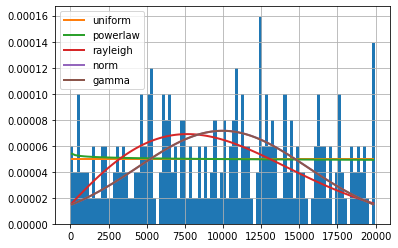

In [ ]:
fa.summary()

De acuerdo la uniforme presenta una significancia alta, al ser la menor, pero todas son significativas porque están por debajo del 5%. Según el aic, muestra como relevante a la uniforme, al presentar el menor valor en el test. Respecto a bic, muestra a la rayleigh como la mejor.

d. Si la frecuencia de los eventos de perdidas sigue una distribución Binomial con parámetros
N=12 y p=0.2, calcule la perdida esperada.

# Punto 4

4. Escoja dos activos que presenten un comportamiento de reversión a la media tipo OU.

a.Construya la gráfica de las series históricas de los precios y/o valores

[*********************100%***********************]  1 of 1 completed


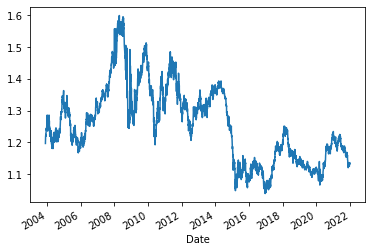

In [ ]:
Activo1 = ["EURUSD=X"]
data1 = yf.download(Activo1,start="2000-01-01",end="2021-12-31")
precios1 = data1.loc[:,"Adj Close"]
precios1.plot()

[*********************100%***********************]  1 of 1 completed


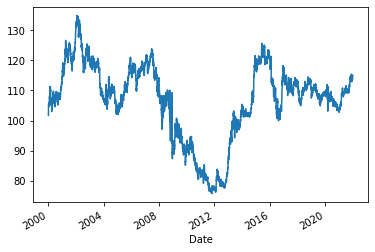

In [ ]:
Activo2 = ["JPY=X"]
data2 = yf.download(Activo2,start="2000-01-01",end="2021-12-31")
precios2 = data2.loc[:,"Adj Close"]
precios2.plot()

[*********************100%***********************]  1 of 1 completed


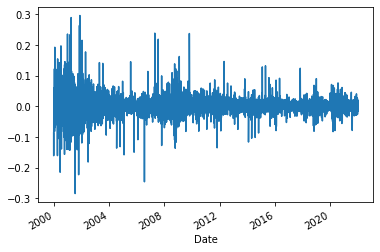

In [ ]:
#Se usa la regresion de un activo para verificar la prueba Dickey-Fuller
Activo1Regre = ["AMZN"]
data1Regre = yf.download(Activo1Regre,start="2000-01-01",end="2021-12-31")
DataRegre = np.log(data1Regre/data1Regre.shift(1)).dropna() #Para uzarla con regresion
precios1Regre = DataRegre.loc[:,"Adj Close"]
precios1Regre.plot()

[*********************100%***********************]  1 of 1 completed


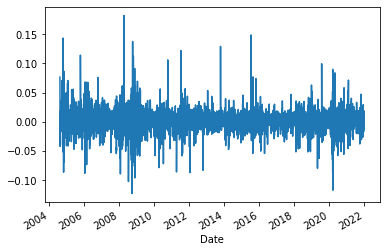

In [ ]:
Activo2Regre = ["GOOG"]
data2Regre = yf.download(Activo2Regre,start="2000-01-01",end="2021-12-31")
Data2Regre = np.log(data2Regre/data2Regre.shift(1)).dropna() #Para uzarla con regresion
precios2Regre = Data2Regre.loc[:,"Adj Close"]
precios2Regre.plot()

b. Presente los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

In [ ]:
# Test Dickey-Fuller para "EURUSD=X"
from statsmodels.tsa.stattools import adfuller
# Prueba 
pruebadf1 = adfuller(precios1)  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.963511
P-value: 0.302798
Citical values:
	1%: -3.431755
	5%: -2.862161
	10%: -2.567100


Para el activo "EURUSD=X" tenemos que segun la prueba de Dickey-Fuller, no cumple con estacionalidad, esto debido a que el valor ADF es menor que los valores criticos. 

In [ ]:
# Test Dickey-Fuller para "JPY=X"
from statsmodels.tsa.stattools import adfuller
# Prueba 
pruebadf1 = adfuller(precios2)  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.678012
P-value: 0.442475
Citical values:
	1%: -3.431502
	5%: -2.862049
	10%: -2.567041


Para el activo "JPY=X" al igual que el "EURUSD=X" tenemos que segun la prueba de Dickey-Fuller, no cumple con estacionalidad, esto debido a que el valor ADF es menor que los valores criticos.

In [ ]:
# Test Dickey-Fuller para "AMZN"
from statsmodels.tsa.stattools import adfuller
# Prueba 
pruebadf1 = adfuller(precios1Regre)  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -12.617186
P-value: 0.000000
Citical values:
	1%: -3.431540
	5%: -2.862066
	10%: -2.567050


In [ ]:
# Test Dickey-Fuller para "GOOG"
from statsmodels.tsa.stattools import adfuller
# Prueba 
pruebadf1 = adfuller(precios2Regre)  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -25.259058
P-value: 0.000000
Citical values:
	1%: -3.431849
	5%: -2.862202
	10%: -2.567123


Para el estudio que se hizo entre los 2 activos en retornos se vio una clara estacionalidad, para AMZN que tuvo un ADF de 12.61, bastante superior a los valores criticos y para GOOG tuvo un ADF de 25.25, en el que ambos muestran claramente una estacionalidad al contrario de los otros activos anteriormente vistos.

c. Construya 100 trayectorias o simulaciones para cada activo con periodicidad mensual y
con duración T=1.

EURUSD=X

In [ ]:
retornos2 = np.log(precios1/precios1.shift(1)).dropna()
retornos2

Date
2003-12-02    0.010307
2003-12-03    0.002809
2003-12-04   -0.003473
2003-12-05    0.008736
2003-12-08    0.002709
                ...   
2021-12-24   -0.000136
2021-12-27   -0.000272
2021-12-28    0.000510
2021-12-29   -0.001347
2021-12-30    0.004002
Name: Adj Close, Length: 4689, dtype: float64

In [ ]:
mu = retornos2.mean()
sigma = retornos2.std()
mu,sigma

(-1.1063169505369531e-05, 0.0073337737420766415)

In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):   
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S # {"S":S} 
    return St

In [ ]:
T = 1
sigma = sigma
mu = mu
S0 = precios1.iloc[-1]
NS = 100
M = 12
St = PathsGBM(S0,mu,sigma,T,NS,M)
St

array([[1.13601506, 1.13222514, 1.13123132, ..., 1.12954896, 1.13031183,
        1.12969693],
       [1.13601506, 1.13730786, 1.13033438, ..., 1.14100363, 1.14392575,
        1.14610163],
       [1.13601506, 1.13429501, 1.13713491, ..., 1.14777125, 1.15026553,
        1.15230339],
       ...,
       [1.13601506, 1.13973174, 1.13586811, ..., 1.13857971, 1.13839368,
        1.13946558],
       [1.13601506, 1.13142744, 1.13373323, ..., 1.14637724, 1.14488249,
        1.14852403],
       [1.13601506, 1.14248997, 1.14119665, ..., 1.13385998, 1.13801794,
        1.13761787]])

Text(0, 0.5, 'S(t)')

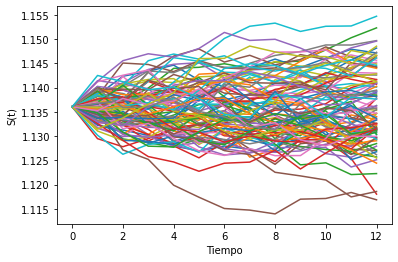

In [ ]:
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")
plt.ylabel("S(t)")

JPY=X

In [ ]:
retornos3 = np.log(precios2/precios2.shift(1)).dropna()
retornos3

Date
2000-01-04    0.014158
2000-01-05    0.009169
2000-01-06    0.010893
2000-01-07    0.000950
2000-01-10   -0.001615
                ...   
2021-12-24    0.002949
2021-12-27   -0.001093
2021-12-28    0.004007
2021-12-29   -0.000166
2021-12-30    0.001524
Name: Adj Close, Length: 5709, dtype: float64

In [ ]:
mu = retornos3.mean()
sigma= retornos3.std()
mu,sigma

(2.1466253527063385e-05, 0.007173519512283642)

In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):   
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S # {"S":S} 
    return St

In [ ]:
T = 1
sigma = sigma
mu = mu
S0 = precios2.iloc[-1]
NS = 100
M = 12
St = PathsGBM(S0,mu,sigma,T,NS,M)
St

array([[114.94799805, 114.70565572, 114.66708174, ..., 115.07067826,
        115.05359955, 114.88322496],
       [114.94799805, 115.04172886, 114.91613286, ..., 113.03048281,
        113.00285092, 113.39334582],
       [114.94799805, 114.78361073, 114.4222511 , ..., 112.48453216,
        112.50233933, 112.46390655],
       ...,
       [114.94799805, 114.94832637, 115.13557041, ..., 115.19783624,
        115.21118894, 115.02228   ],
       [114.94799805, 115.17008361, 115.09480745, ..., 114.65053206,
        114.59264212, 114.75938786],
       [114.94799805, 115.28303485, 115.82972064, ..., 116.63517663,
        116.83229891, 116.93840858]])

Text(0, 0.5, 'S(t)')

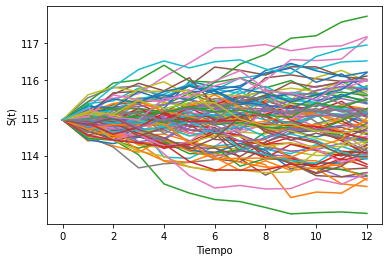

In [ ]:
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")
plt.ylabel("S(t)")